In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.sample(5)
# test.sample(5)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
214184,214184,68,1,4,120,282,0,2,173,1,4.0,2,1,7,Presence
73806,73806,41,1,4,120,211,0,0,152,1,1.6,2,1,7,Presence
489602,489602,52,0,4,120,305,0,2,178,0,0.1,2,1,7,Absence
10832,10832,51,1,4,140,266,0,2,71,1,1.6,2,2,7,Presence
306682,306682,56,1,4,140,226,0,2,155,0,1.8,2,1,7,Presence


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [4]:
train.describe()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000
max,629999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [5]:
train.isnull().sum()

,0
id,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0


In [6]:
train.drop(columns=["id"],  inplace=True)
test_ids = test["id"]
test.drop(columns=["id"],  inplace=True)

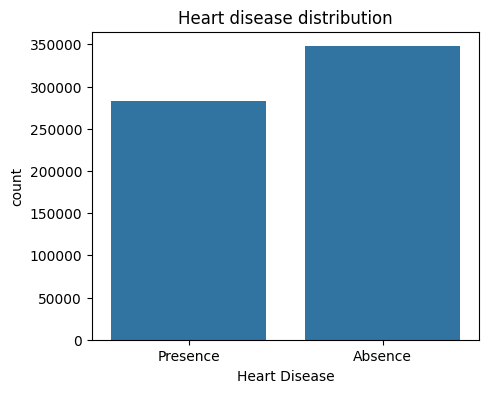

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x=train["Heart Disease"])
plt.title("Heart disease distribution")
plt.show()

In [8]:
def plot_heart_features(df):
    features = [
        "Age",
        "Sex",
        "Chest pain type",
        "BP",
        "Cholesterol",
        "FBS over 120",
        "EKG results",
        "Max HR",
        "Exercise angina",
        "ST depression",
        "Slope of ST",
        "Number of vessels fluro",
        "Thallium"
    ]

    fig, axes = plt.subplots(3, 4, figsize=(20, 12))
    axes = axes.flatten()

    for i, feature in enumerate(features[:12]):  # 4x3 = 12 plots
        if feature not in df.columns:
            continue

        if pd.api.types.is_numeric_dtype(df[feature]):
            axes[i].hist(df[feature].dropna())
            axes[i].set_ylabel("Frequency")
        else:
            counts = df[feature].value_counts()
            axes[i].bar(counts.index.astype(str), counts.values)
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].set_ylabel("Count")

        axes[i].set_title(feature)

    plt.tight_layout()
    plt.show()


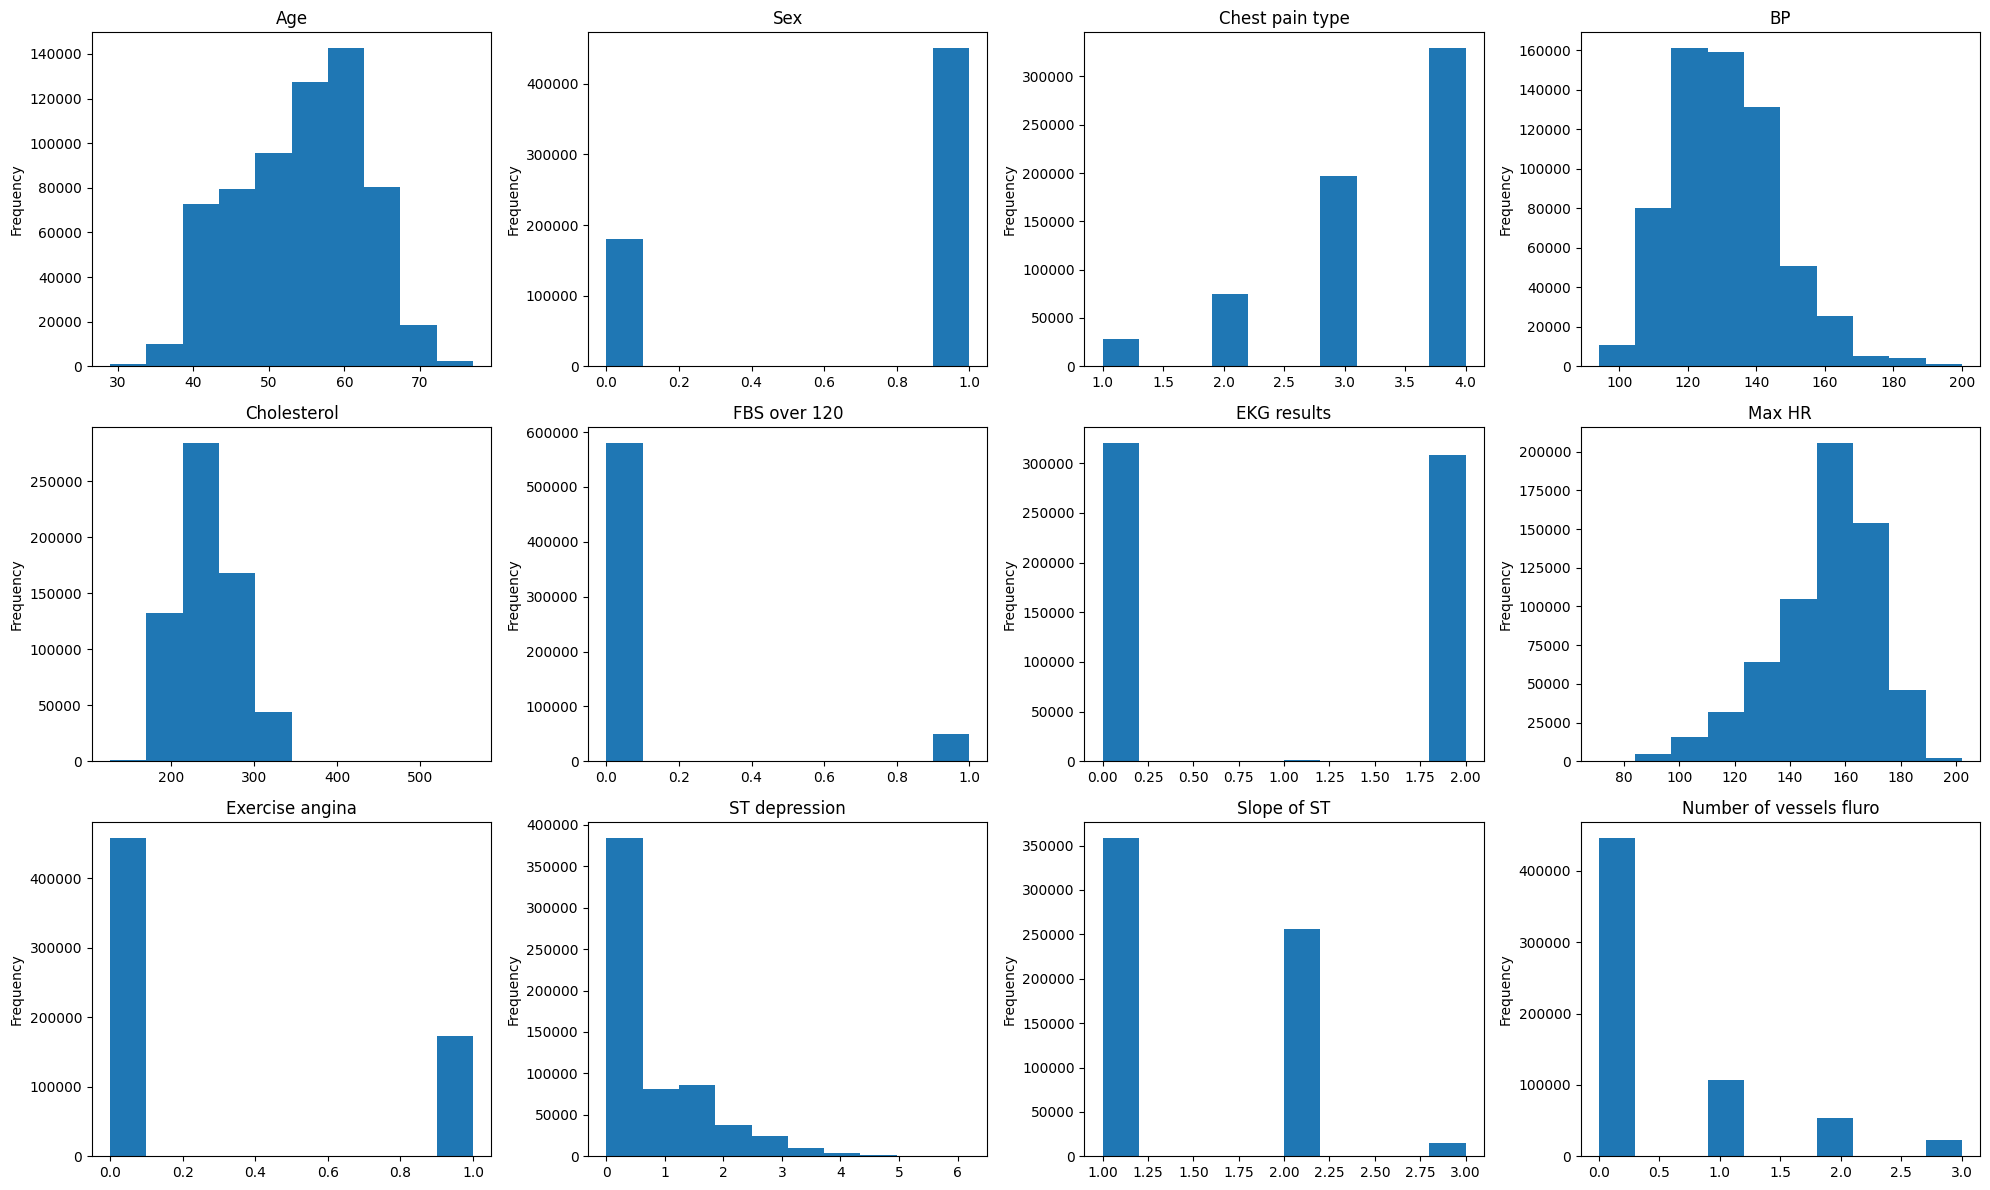

In [9]:
plot_heart_features(train)

In [ ]:
sns.heatmap(train.corr(), annot=True)
plt.show()

In [11]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 9.0 MB/s eta 0:00:00


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from catboost import CatBoostClassifier

In [13]:
target = "Heart Disease"

X = train.drop(columns=[target])
y = train[target]

X.select_dtypes(include=["object"]).columns

le = LabelEncoder()
y = le.fit_transform(y)

# Applying Random Forest

In [ ]:
rfc = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        n_jobs=-1,
        random_state=42
    )

# scores = cross_val_score(rfc, X, y, cv=5)

# print("Fold Scores:", scores)
# print("Mean CV Score:", scores.mean())


rfc.fit(X, y)

y_pred = rfc.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n")
print(classification_report(y, y_pred))



Accuracy: 0.9073603174603174

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92    347546
           1       0.91      0.89      0.90    282454

    accuracy                           0.91    630000
   macro avg       0.91      0.91      0.91    630000
weighted avg       0.91      0.91      0.91    630000



In [ ]:
test_rfc = rfc.predict_proba(test)[:, 1]
oof_rfc = rfc.predict_proba(train.drop(columns=[target]))[:, 1]
roc_auc_score(train[target], oof_rfc)

0.9683154058141596

In [14]:
X = pd.DataFrame(X)
y = pd.Series(y)

# Applying XGboost

In [ ]:
# 'learning_rate': 0.02991957949910793, 'max_depth': 3, 'min_child_weight': 8.852531449685662, 'subsample': 0.820977051070539, 'colsample_bytree': 0.8249105082984818, 'reg_alpha': 5.31487541857897, 'reg_lambda': 1.4657671110020007, 'gamma': 0.41622790860989667}

In [20]:
from sklearn.model_selection import StratifiedKFold

X = pd.DataFrame(X)
y = pd.Series(y)

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

oof_xgb = np.zeros(len(X))
test_xgb = np.zeros(len(test))


for fold, (train_idx, val_idx) in enumerate(k_fold.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb = XGBClassifier(
        n_estimators=2000,
        learning_rate=0.02991957949910793,
        max_depth=3,
        subsample=0.820977051070539,
        colsample_bytree=0.8249105082984818,
        reg_lambda=1.4657671110020007,
        reg_alpha=5.31487541857897,
        min_child_weight=8.852531449685662,
        gamma=0.4162279086098966,
        tree_method="hist",
        device="cuda",          # enables GPU
        eval_metric="auc",
        early_stopping_rounds=100,
        random_state=42,
        n_jobs=-1
    )

    xgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    oof_xgb[val_idx] = xgb.predict_proba(X_val)[:, 1]
    test_xgb += xgb.predict_proba(test)[:, 1] / k_fold.n_splits

print("FAST XGB AUC:", roc_auc_score(y, oof_xgb))

FAST XGB AUC: 0.9555130717815015


In [58]:
y_pred_xgb = xgb.predict(X)

print("Accuracy:", accuracy_score(y, y_pred_xgb))
print("\nClassification Report:\n")
print(classification_report(y, y_pred_xgb))

Accuracy: 0.8894015873015872

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    347546
           1       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000



# Catboost

In [22]:
oof_cat = np.zeros(len(X))
test_cat = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(k_fold.split(X, y)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    cat = CatBoostClassifier(
        iterations=3091,
        learning_rate=0.04963674908044717,
        depth=4,
        l2_leaf_reg=4.3874876523189394,
        bagging_temperature=0.3401704702286477,
        random_strength=3.372651467834558,
        task_type="GPU",      # <-- enable GPU
        devices="0",          # optional, selects GPU 0
        verbose=0,
        random_state=42
    )


    cat.fit(X_train, y_train)

    oof_cat[val_idx] = cat.predict_proba(X_val)[:,1]
    test_cat += cat.predict_proba(test)[:,1] / k_fold.n_splits

print("CAT AUC:", roc_auc_score(y, oof_cat))

CAT AUC: 0.9555630633427729


In [59]:
y_pred_cat = cat.predict(X)

print("Accuracy:", accuracy_score(y, y_pred_cat))
print("\nClassification Report:\n")
print(classification_report(y, y_pred_cat))

Accuracy: 0.8904428571428571

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    347546
           1       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000



# lightGBM

In [ ]:
# Best params: {'learning_rate': 0.03835277907158992, 'num_leaves': 16, 'min_child_samples': 64, 'subsample': 0.7053029681144002, 'colsample_bytree': 0.6585537083850933, 'reg_alpha': 3.8514759713725737, 'reg_lambda': 3.989884511111578}

In [23]:
oof_lgb = np.zeros(len(X))
test_lgb = np.zeros(len(test))

for fold, (train_idx, val_idx) in enumerate(k_fold.split(X, y)):

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    lgb = LGBMClassifier(
        n_estimators=1500,
        learning_rate=0.03835277907158992,
        max_depth=-1,
        num_leaves=16,
        min_child_samples=64,
        subsample=0.7053029681144002,
        colsample_bytree=0.6585537083850933,
        reg_lambda=3.989884511111578,
        reg_alpha=3.8514759713725737,
        device='cpu',
        random_state=42,
        n_jobs=-1
    )

    lgb.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(0)
        ]
    )

    oof_lgb[val_idx] = lgb.predict_proba(X_val)[:,1]
    test_lgb += lgb.predict_proba(test)[:,1] / k_fold.n_splits

print("FAST LGB AUC:", roc_auc_score(y, oof_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 254208, number of negative: 312792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 567000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207386
[LightGBM] [Info] Start training from score -0.207386
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1348]	valid_0's auc: 0.955369	valid_0's binary_logloss: 0.268136
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

In [60]:
y_pred_lgb = lgb.predict(X)

print("Accuracy:", accuracy_score(y, y_pred_lgb))
print("\nClassification Report:\n")
print(classification_report(y, y_pred_lgb))

Accuracy: 0.8904095238095238

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.90    347546
           1       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000



In [ ]:
from scipy.optimize import minimize

# oof_preds shape: (n_samples, 4) — one column per model
# order: catboost, xgboost, random_forest, lightgbm

def neg_auc(weights):
    weights = np.array(weights)
    weights = weights / weights.sum()  # normalize
    blended = oof_preds @ weights
    return -roc_auc_score(y_true, blended)

result = minimize(
    neg_auc,
    x0=[0.25, 0.25, 0.25, 0.25],  # start equal
    method='Nelder-Mead'
)

optimal_weights = result.x / result.x.sum()
print(optimal_weights)

# optimizing catboost


In [16]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 13.7 MB/s eta 0:00:00


In [17]:
import optuna

In [ ]:
def objective(trial):

    params = {
        "iterations": trial.suggest_int("iterations", 1000, 4000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 5),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "task_type": "GPU",
        "devices": "0",
        "verbose": 0,
        "random_state": 42,
        "eval_metric": "AUC"
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))

    for train_idx, val_idx in kf.split(X, y):

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostClassifier(**params)

        model.fit(
            X_train,
            y_train,
            eval_set=(X_val, y_val),
            early_stopping_rounds=200,
            verbose=False
        )

        oof[val_idx] = model.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best AUC:", study.best_value)
print("Best params:", study.best_params)


[I 2026-02-18 06:49:40,778] A new study created in memory with name: no-name-aaba9c54-d920-4398-a7f6-bdb5ab68bee0
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
[I 2026-02-18 06:51:30,486] Trial 0 finished with value: 0.9552730534542573 and parameters: {'iterations': 2300, 'learning_rate': 0.014786376532689596, 'depth': 5, 'l2_leaf_reg': 4.677118287084541, 'bagging_temperature': 0.5974805975813974, 'random_strength': 7.852054288781005}. Best is trial 0 with value: 0.9552730534542573.
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GPU
Default metric period is 5 because AUC is/are not implemented for GP

Best AUC: 0.9555449282411002
Best params: {'iterations': 3091, 'learning_rate': 0.04963674908044717, 'depth': 4, 'l2_leaf_reg': 4.3874876523189394, 'bagging_temperature': 0.19298057640645594, 'random_strength': 2.9411215634440433}


# optimizing lightGBM

In [ ]:
def objective(trial):

    params = {
        "n_estimators": 2000,  # large upper bound, early stopping handles actual stopping
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 128),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "random_state": 42,
        "n_jobs": -1,
        "device": "cpu"
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))

    for train_idx, val_idx in kf.split(X, y):

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        lgb = LGBMClassifier(**params)

        lgb.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric="auc",
            callbacks=[
                early_stopping(stopping_rounds=100),
                log_evaluation(0)
            ]
        )

        oof[val_idx] = lgb.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof)


In [ ]:
study_lbg = optuna.create_study(direction="maximize")
study_lbg.optimize(objective, n_trials=30)

print("Best AUC:", study_lbg.best_value)
print("Best params:", study_lbg.best_params)


Early stopping, best iteration is:
[839]	valid_0's auc: 0.955733	valid_0's binary_logloss: 0.266902
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[720]	valid_0's auc: 0.954696	valid_0's binary_logloss: 0.270159
[LightGBM] [Warnin

[I 2026-02-18 15:59:40,167] Trial 17 finished with value: 0.9553678545356179 and parameters: {'learning_rate': 0.03409226557251906, 'num_leaves': 40, 'min_child_samples': 49, 'subsample': 0.7924140264284929, 'colsample_bytree': 0.6608462593705416, 'reg_alpha': 7.976848926994521, 'reg_lambda': 2.8333893205103027}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1008]	valid_0's auc: 0.955581	valid_0's binary_logloss: 0.267424
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

[I 2026-02-18 16:03:54,067] Trial 18 finished with value: 0.9552396379123136 and parameters: {'learning_rate': 0.020155208758381532, 'num_leaves': 47, 'min_child_samples': 79, 'subsample': 0.6991225964241096, 'colsample_bytree': 0.8463467423659454, 'reg_alpha': 2.7090562204800572, 'reg_lambda': 5.207370494620619}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1154]	valid_0's auc: 0.955563	valid_0's binary_logloss: 0.267416
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

[I 2026-02-18 16:09:03,965] Trial 19 finished with value: 0.9552445525282692 and parameters: {'learning_rate': 0.01751764001667746, 'num_leaves': 67, 'min_child_samples': 61, 'subsample': 0.6493417677444251, 'colsample_bytree': 0.7612884271390961, 'reg_alpha': 4.963658201666489, 'reg_lambda': 2.87660936179174}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[723]	valid_0's auc: 0.955744	valid_0's binary_logloss: 0.2669
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22

[I 2026-02-18 16:11:44,236] Trial 20 finished with value: 0.9553882692662042 and parameters: {'learning_rate': 0.0404567764309852, 'num_leaves': 29, 'min_child_samples': 32, 'subsample': 0.7697926498642235, 'colsample_bytree': 0.6564387726146733, 'reg_alpha': 4.5904639165158265, 'reg_lambda': 7.473710973523529}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1477]	valid_0's auc: 0.955758	valid_0's binary_logloss: 0.266871
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

[I 2026-02-18 16:15:45,912] Trial 21 finished with value: 0.9554081864862424 and parameters: {'learning_rate': 0.026241806260276723, 'num_leaves': 17, 'min_child_samples': 67, 'subsample': 0.7279791703819313, 'colsample_bytree': 0.7280113455286293, 'reg_alpha': 2.9640568310426914, 'reg_lambda': 0.5379660385088512}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1560]	valid_0's auc: 0.955772	valid_0's binary_logloss: 0.266825
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

[I 2026-02-18 16:20:00,299] Trial 22 finished with value: 0.9554180834607164 and parameters: {'learning_rate': 0.02658033986600185, 'num_leaves': 16, 'min_child_samples': 71, 'subsample': 0.7174504153005864, 'colsample_bytree': 0.6985383045977366, 'reg_alpha': 2.692304990285254, 'reg_lambda': 5.083819780125926}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1030]	valid_0's auc: 0.955727	valid_0's binary_logloss: 0.266959
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive:

[I 2026-02-18 16:23:35,978] Trial 23 finished with value: 0.9553694119167587 and parameters: {'learning_rate': 0.030147397384194058, 'num_leaves': 29, 'min_child_samples': 46, 'subsample': 0.6724814881323026, 'colsample_bytree': 0.6714937952356322, 'reg_alpha': 2.8026978606500776, 'reg_lambda': 4.889562939956253}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[883]	valid_0's auc: 0.955748	valid_0's binary_logloss: 0.266874
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

[I 2026-02-18 16:26:01,547] Trial 24 finished with value: 0.9553920662521189 and parameters: {'learning_rate': 0.03942214244585887, 'num_leaves': 27, 'min_child_samples': 72, 'subsample': 0.7056652205457202, 'colsample_bytree': 0.7002584513174861, 'reg_alpha': 6.053587993789819, 'reg_lambda': 5.7158392331252745}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[1142]	valid_0's auc: 0.955612	valid_0's binary_logloss: 0.267228
[LightGBM] [Warning] Found whitespace in f

[I 2026-02-18 16:30:41,833] Trial 25 finished with value: 0.9553083593753309 and parameters: {'learning_rate': 0.015471606098317981, 'num_leaves': 95, 'min_child_samples': 87, 'subsample': 0.7215569046470239, 'colsample_bytree': 0.6398423003508458, 'reg_alpha': 4.300056516799754, 'reg_lambda': 4.203109186629349}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1039]	valid_0's auc: 0.95554	valid_0's binary_logloss: 0.267512
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

[I 2026-02-18 16:33:53,955] Trial 26 finished with value: 0.9552187992864618 and parameters: {'learning_rate': 0.02121730031325314, 'num_leaves': 65, 'min_child_samples': 59, 'subsample': 0.8331673740047825, 'colsample_bytree': 0.7649364388009836, 'reg_alpha': 1.514282957468677, 'reg_lambda': 2.5579135661144417}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[946]	valid_0's auc: 0.955682	valid_0's binary_logloss: 0.267082
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

[I 2026-02-18 16:36:45,758] Trial 27 finished with value: 0.9553450023766945 and parameters: {'learning_rate': 0.02977131022406585, 'num_leaves': 36, 'min_child_samples': 79, 'subsample': 0.8172514000095259, 'colsample_bytree': 0.694591538735921, 'reg_alpha': 2.4804910645574525, 'reg_lambda': 4.454185554115726}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[520]	valid_0's auc: 0.955599	valid_0's binary_logloss: 0.267349
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 

[I 2026-02-18 16:38:47,768] Trial 28 finished with value: 0.9552504246063993 and parameters: {'learning_rate': 0.04102020236263113, 'num_leaves': 46, 'min_child_samples': 48, 'subsample': 0.6544047743243724, 'colsample_bytree': 0.8329641415192894, 'reg_alpha': 4.852920681568006, 'reg_lambda': 7.008628270743147}. Best is trial 12 with value: 0.9554222733585878.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 504000, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448339 -> initscore=-0.207383
[LightGBM] [Info] Start training from score -0.207383
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[2000]	valid_0's auc: 0.955735	valid_0's binary_logloss: 0.266958
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number

[I 2026-02-18 16:43:55,319] Trial 29 finished with value: 0.955389430837229 and parameters: {'learning_rate': 0.014098699302142664, 'num_leaves': 16, 'min_child_samples': 57, 'subsample': 0.6036198178484676, 'colsample_bytree': 0.6300247312696052, 'reg_alpha': 1.3037096740842915, 'reg_lambda': 3.16798644589756}. Best is trial 12 with value: 0.9554222733585878.


Best AUC: 0.9554222733585878
Best params: {'learning_rate': 0.03835277907158992, 'num_leaves': 16, 'min_child_samples': 64, 'subsample': 0.7053029681144002, 'colsample_bytree': 0.6585537083850933, 'reg_alpha': 3.8514759713725737, 'reg_lambda': 3.989884511111578}


# optimizing xgboost

In [18]:
def objective(trial):

    params = {
        "n_estimators": 3000,  # high cap, early stopping handles actual trees
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "tree_method": "hist",
        "device": "cuda",
        "eval_metric": "auc",
        "early_stopping_rounds": 100,
        "random_state": 42,
        "n_jobs": -1
    }

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))

    for train_idx, val_idx in kf.split(X, y):

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        xgb_temp = XGBClassifier(**params)

        xgb_temp.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        oof[val_idx] = xgb_temp.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof)


In [19]:
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective, n_trials=30)

print("Best AUC:", study_xgb.best_value)
print("Best Params:", study_xgb.best_params)


[I 2026-02-19 04:14:47,360] A new study created in memory with name: no-name-a09aa168-a485-4826-9b5f-0d02e7f61a0a
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:751: UserWarning: [04:14:55] WARNING: /__w/xgboost/xgboost/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
[I 2026-02-19 04:15:26,223] Trial 0 finished with value: 0.9553152598721497 and parameters: {'learning_rate': 0.015928504682967748, 'max_depth': 7, 'min_child_weight': 1.4445696417754847, 'subsample': 0.7662004769393668, 'colsample_bytree': 0.7139181281976675, 'reg_alpha': 6.396035034783911, 'reg_lambda': 3.649941062063513, 'gamm

Best AUC: 0.9555311993041566
Best Params: {'learning_rate': 0.02991957949910793, 'max_depth': 3, 'min_child_weight': 8.852531449685662, 'subsample': 0.820977051070539, 'colsample_bytree': 0.8249105082984818, 'reg_alpha': 5.31487541857897, 'reg_lambda': 1.4657671110020007, 'gamma': 0.41622790860989667}


# training meta model

In [39]:
from sklearn.linear_model import Ridge

In [24]:
stack_X = np.vstack([oof_xgb, oof_lgb, oof_cat]).T
stack_test = np.vstack([test_xgb, test_lgb, test_cat]).T

In [34]:
meta = LogisticRegression(
    C=0.0339967531927407,
    penalty='l2',
    solver="liblinear",
    max_iter=5000,
    random_state=42
)

meta.fit(stack_X, y)

stack_oof_pred = meta.predict_proba(stack_X)[:, 1]
print("FINAL STACK AUC:", roc_auc_score(y, stack_oof_pred))

final_pred = meta.predict_proba(stack_test)[:, 1]

FINAL STACK AUC: 0.9555813933698495


In [63]:
y_pred_meta_ridge = meta.predict(stack_X)

print("Accuracy:", accuracy_score(y, y_pred_meta_ridge))
print("\nClassification Report:\n")
print(classification_report(y, y_pred_meta_ridge))

Accuracy: 0.8889095238095238

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    347546
           1       0.88      0.87      0.88    282454

    accuracy                           0.89    630000
   macro avg       0.89      0.89      0.89    630000
weighted avg       0.89      0.89      0.89    630000



In [54]:
meta_ridge = Ridge(
    # alpha=1.0,
    alpha=9.77704908506963,  # regularization strength
    random_state=42
)

meta_ridge.fit(stack_X, y)

stack_oof_pred_ridge = meta_ridge.predict(stack_X)
print("FINAL STACK AUC:", roc_auc_score(y, stack_oof_pred_ridge))

final_pred_ridge = meta_ridge.predict(stack_test)


FINAL STACK AUC: 0.9555826080296511


In [35]:
print(roc_auc_score(y, oof_xgb))
print(roc_auc_score(y, oof_lgb))
print(roc_auc_score(y, oof_cat))
print(roc_auc_score(y, stack_oof_pred))

0.9555130717815015
0.955462104324948
0.9555630633427729
0.9555813933698495


In [27]:
final_pred = meta.predict_proba(stack_test)[:, 1]

# optimizing meta learner

In [30]:
def objective(trial):

    C = trial.suggest_float("C", 1e-4, 100, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", "l1"])
    solver = "liblinear"  # supports l1 + l2

    meta_temp = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=5000,
        random_state=42
    )

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    oof_meta = np.zeros(len(stack_X))

    for train_idx, val_idx in kf.split(stack_X, y):
        X_tr, X_val = stack_X[train_idx], stack_X[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        meta_temp.fit(X_tr, y_tr)
        oof_meta[val_idx] = meta_temp.predict_proba(X_val)[:, 1]

    return roc_auc_score(y, oof_meta)

In [31]:
study_meta = optuna.create_study(direction="maximize")
study_meta.optimize(objective, n_trials=50)

print("Best Params:", study_meta.best_params)
print("Best AUC:", study_meta.best_value)

[I 2026-02-19 05:03:53,815] A new study created in memory with name: no-name-d0325b01-07d9-4bfa-bf00-f24d7c46bb2a
[I 2026-02-19 05:04:30,286] Trial 0 finished with value: 0.9555565211226155 and parameters: {'C': 0.006387872165252498, 'penalty': 'l1'}. Best is trial 0 with value: 0.9555565211226155.
[I 2026-02-19 05:04:33,055] Trial 1 finished with value: 0.9553610301040194 and parameters: {'C': 47.698118964466616, 'penalty': 'l2'}. Best is trial 0 with value: 0.9555565211226155.
[I 2026-02-19 05:07:07,354] Trial 2 finished with value: 0.9553756322833423 and parameters: {'C': 39.39777921934543, 'penalty': 'l1'}. Best is trial 0 with value: 0.9555565211226155.
[I 2026-02-19 05:09:25,825] Trial 3 finished with value: 0.9554034026592735 and parameters: {'C': 0.2938538339377038, 'penalty': 'l1'}. Best is trial 0 with value: 0.9555565211226155.
[I 2026-02-19 05:11:56,922] Trial 4 finished with value: 0.955375873385744 and parameters: {'C': 17.168920391154195, 'penalty': 'l1'}. Best is trial 

Best Params: {'C': 0.0339967531927407, 'penalty': 'l2'}
Best AUC: 0.9555756711912393


# optimizing ridge meta learner

In [45]:
def objective_ridge(trial):

    alpha = trial.suggest_float("alpha", 1e-4, 100, log=True)

    meta_temp_ridge = Ridge(
        alpha=alpha,
        random_state=42
    )

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof_meta_ridge = np.zeros(len(stack_X))

    for train_idx, val_idx in kf.split(stack_X, y):
        X_tr, X_val = stack_X[train_idx], stack_X[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        meta_temp_ridge.fit(X_tr, y_tr)
        oof_meta_ridge[val_idx] = meta_temp_ridge.predict(X_val)

    return roc_auc_score(y, oof_meta_ridge)

In [49]:
study_ridge = optuna.create_study(direction="maximize")
study_ridge.optimize(objective_ridge, n_trials=100)

print("Best alpha:", study_ridge.best_params)
print("Best AUC:", study_ridge.best_value)

[I 2026-02-19 05:37:14,021] A new study created in memory with name: no-name-20029a77-ab96-45ba-8225-507ef60d11f0
[I 2026-02-19 05:37:14,607] Trial 0 finished with value: 0.9555793300027001 and parameters: {'alpha': 0.02151404714842221}. Best is trial 0 with value: 0.9555793300027001.
[I 2026-02-19 05:37:15,330] Trial 1 finished with value: 0.9555793272726238 and parameters: {'alpha': 0.010786769967290895}. Best is trial 0 with value: 0.9555793300027001.
[I 2026-02-19 05:37:16,291] Trial 2 finished with value: 0.9555800016931288 and parameters: {'alpha': 11.46713437488136}. Best is trial 2 with value: 0.9555800016931288.
[I 2026-02-19 05:37:17,013] Trial 3 finished with value: 0.9555793257038487 and parameters: {'alpha': 0.0014794943990665147}. Best is trial 2 with value: 0.9555800016931288.
[I 2026-02-19 05:37:17,701] Trial 4 finished with value: 0.9555793343015515 and parameters: {'alpha': 0.05293789009938447}. Best is trial 2 with value: 0.9555800016931288.
[I 2026-02-19 05:37:18,25

Best alpha: {'alpha': 9.77704908506963}
Best AUC: 0.9555800263453096


In [57]:
# blended = (
#     0.27 * test_cat +
#     0.26 * test_xgb +
#     0.20 * test_rfc +
#     0.27 * test_lgb
# )

submission = pd.DataFrame({
    "id": test_ids,
    "Heart Disease": final_pred_ridge
})

submission.to_csv("submission_xgb_lgb_cat_stacked_ridge_optimized.csv", index=False)
submission.head()

,id,Heart Disease
0,630000,0.952750
1,630001,0.007950
2,630002,0.989335
3,630003,0.004676
4,630004,0.202985


#

In [38]:
import joblib

joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(lgb, "lgb_model.pkl")
joblib.dump(cat, "cat_model.pkl")
joblib.dump(meta_ridge, "stack_meta.pkl")

joblib.dump(list(X.columns), "feature_order.pkl")

full_model = {
    "xgb": xgb,
    "lgb": lgb,
    "cat": cat,
    "meta": meta_ridge,
    "features": list(X.columns)
}

joblib.dump(full_model, "stacked_model.pkl")



['stacked_model.pkl']